## Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
#Randomly shuffling rows of dataset
df = df.sample(frac=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S


In [3]:
print(df.shape)

(891, 12)


## Preprocessing

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
len(set(df['Cabin']))

148

In [6]:
#Extracting important Features for our models
data = df[['Age','Fare','SibSp','Parch','Pclass','Sex','Survived']]


In [7]:
#Filling NaN values with the mean of that column
data.fillna(data.mean(), inplace=True)
print(data.shape)

(891, 7)


In [8]:
#Creating a new feature from sibling count and parent count

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [9]:
#Dividing the Age into groups

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4

In [10]:
data.head()

,Age,Fare,SibSp,Parch,Pclass,Sex,Survived,FamilySize
490,1.0,19.9667,1,0,3,male,0,2
537,1.0,106.4250,0,0,1,female,1,1
565,1.0,24.1500,2,0,3,male,0,3
671,1.0,52.0000,1,0,1,male,0,2
478,1.0,7.5208,0,0,3,male,0,1


In [11]:
#Dropping the unnecessary columns
data.drop(['SibSp','Parch'],axis=1, inplace=True)
data.head()

,Age,Fare,Pclass,Sex,Survived,FamilySize
490,1.0,19.9667,3,male,0,2
537,1.0,106.4250,1,female,1,1
565,1.0,24.1500,3,male,0,3
671,1.0,52.0000,1,male,0,2
478,1.0,7.5208,3,male,0,1


In [12]:
# Dividing the dataset into Input and Outputs

y = data['Survived'].values
X = data[['Age','Fare','Pclass','FamilySize']]

In [13]:
#Reversing the pclass 
#older 1:upper 2:middle 3:lower
#new 1:lower 2:middle 3:upper

print(X['Pclass'].head())
X['Pclass'] = 4 - X['Pclass'].copy()
print('---------------------------------------')
print(X['Pclass'].head())

490    3
537    1
565    3
671    1
478    3
Name: Pclass, dtype: int64
---------------------------------------
490    1
537    3
565    1
671    3
478    1
Name: Pclass, dtype: int64


### OneHotEncoding

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
#Converting the 'Sex' to column to one hot Array.

lb = LabelEncoder()
data = data.apply(lb.fit_transform)

In [16]:
ohe = OneHotEncoder()
ohe.fit(pd.DataFrame(data['Sex']))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [17]:
onehotlabel = ohe.transform(pd.DataFrame(data['Sex'])).toarray()

In [18]:
X.columns

Index(['Age', 'Fare', 'Pclass', 'FamilySize'], dtype='object')

In [19]:
#X = X.iloc[:,:-1].values

In [20]:
X.shape

(891, 4)

In [21]:
X = np.append(X,onehotlabel,axis=1)

In [22]:
X.shape

(891, 6)

In [23]:
#Normalizing the dataset to imporve training

from sklearn.preprocessing import normalize
X = normalize(X)
print(X[0])

[0.0496494  0.99133474 0.0496494  0.09929881 0.         0.0496494 ]


In [48]:
#Splitting the whole dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

print(X_train.shape)
X_test.shape

(712, 6)


(179, 6)

## Modelling

### SVM

In [49]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train,y_train)

pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print(accuracy)

0.6368715083798883


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

accuracy = model1.score(X_test,y_test)
print(accuracy)

0.8491620111731844


### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()

model2.fit(X_train, y_train)

accuracy = model2.score(X_test,y_test)
print(accuracy)

0.8324022346368715


### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(X_train, y_train)

accuracy = model3.score(X_test,y_test)
print(accuracy)

0.7597765363128491


### Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(X_train, y_train)

accuracy = model4.score(X_test,y_test)
print(accuracy)

0.6368715083798883


### Neural Network

In [30]:
import keras
from keras.models import Model
from keras.layers import Dense, Flatten, Activation, Dropout, Input, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [55]:
nn_inputs = Input(X_train.shape[1:])

#n = Flatten() (nn_inputs)
nn = Dense(32) (nn_inputs)
nn = BatchNormalization()(nn)
nn = Activation('relu')(nn)

'''nn = Dense(32) (nn)
nn = BatchNormalization()(nn)
nn = Activation('tanh')(nn)

nn = Dense(32) (nn)
#nn = BatchNormalization()(nn)
nn = Activation('tanh')(nn)
nn = Dropout(0.2) (nn)'''

nn = Dense(64, activation='relu') (nn)
nn = Dropout(0.3) (nn)

nn = Dense(1)(nn)
nn = Activation('sigmoid')(nn)

nn_model = Model(inputs = nn_inputs, outputs = nn, name='Titanic-32-64')

nn_model.compile(loss='binary_crossentropy',
                 optimizer=Adam(lr=0.0001, decay=0.00001),
                 metrics=['accuracy'])



In [56]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                224       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
__________

In [57]:
history = nn_model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test),batch_size=32)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/step - loss: 0.7132 - acc: 0.5295 - val_loss: 0.6871 - val_acc: 0.6816
Epoch 2/100
712/712 [==============================] - 0s 241us/step - loss: 0.6853 - acc: 0.6025 - val_loss: 0.6740 - val_acc: 0.6983
Epoch 3/100
712/712 [==============================] - 0s 263us/step - loss: 0.6696 - acc: 0.6180 - val_loss: 0.6619 - val_acc: 0.7095
Epoch 4/100
712/712 [==============================] - 0s 219us/step - loss: 0.6510 - acc: 0.6419 - val_loss: 0.6510 - val_acc: 0.7263
Epoch 5/100
712/712 [==============================] - 0s 241us/step - loss: 0.6472 - acc: 0.6559 - val_loss: 0.6403 - val_acc: 0.7486
Epoch 6/100
712/712 [==============================] - 0s 241us/step - loss: 0.6260 - acc: 0.6896 - val_loss: 0.6310 - val_acc: 0.7430
Epoch 7/100
712/712 [==============================] - 0s 219us/step - loss: 0.6111 - acc: 0.7093 - val_loss: 0.6216 - val_acc: 0.7430
Epoch 8/100

Epoch 61/100
712/712 [==============================] - 0s 241us/step - loss: 0.5108 - acc: 0.7809 - val_loss: 0.4883 - val_acc: 0.8045
Epoch 62/100
712/712 [==============================] - 0s 395us/step - loss: 0.5085 - acc: 0.7725 - val_loss: 0.4876 - val_acc: 0.8045
Epoch 63/100
712/712 [==============================] - 0s 263us/step - loss: 0.4933 - acc: 0.7893 - val_loss: 0.4865 - val_acc: 0.8101
Epoch 64/100
712/712 [==============================] - 0s 329us/step - loss: 0.4882 - acc: 0.7837 - val_loss: 0.4857 - val_acc: 0.8101
Epoch 65/100
712/712 [==============================] - 0s 263us/step - loss: 0.4967 - acc: 0.7795 - val_loss: 0.4847 - val_acc: 0.8101
Epoch 66/100
712/712 [==============================] - 0s 307us/step - loss: 0.5007 - acc: 0.7781 - val_loss: 0.4858 - val_acc: 0.8101
Epoch 67/100
712/712 [==============================] - 0s 306us/step - loss: 0.4994 - acc: 0.7739 - val_loss: 0.4854 - val_acc: 0.8101
Epoch 68/100
712/712 [==========================

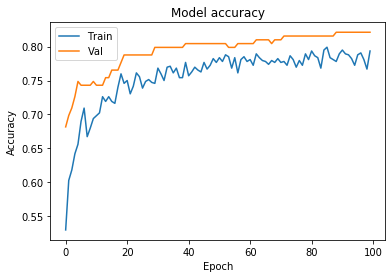

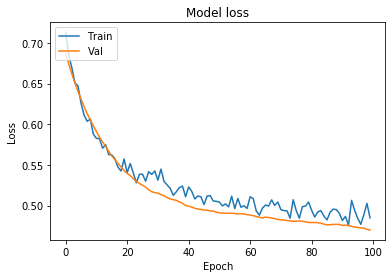

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Making Submissions for kaggle

In [35]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test_d = test[['Age','Fare','Pclass']]

In [37]:
test_d['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [38]:
test_d.fillna(test_d.mean(),inplace=True)

In [39]:
test_d.loc[ test_d['Age'] <= 16, 'Age'] = 0
test_d.loc[(test_d['Age'] > 16) & (test_d['Age'] <= 32), 'Age'] = 1
test_d.loc[(test_d['Age'] > 32) & (test_d['Age'] <= 48), 'Age'] = 2
test_d.loc[(test_d['Age'] > 48) & (test_d['Age'] <= 64), 'Age'] = 3
test_d.loc[ test_d['Age'] > 64, 'Age'] = 4

In [40]:
lb = LabelEncoder()
test['Sex'] = pd.DataFrame(test['Sex']).apply(lb.fit_transform)
ohe = OneHotEncoder()
ohe.fit(pd.DataFrame(test['Sex']))
onehotlabels = ohe.transform(pd.DataFrame(test['Sex'])).toarray()

In [41]:
test_d.head()

,Age,Fare,Pclass,FamilySize
0,2.0,7.8292,3,1
1,2.0,7.0000,3,2
2,3.0,9.6875,2,1
3,1.0,8.6625,3,1
4,1.0,12.2875,3,3


In [42]:
test_d = np.append(test_d,onehotlabels,axis=1)

In [43]:
test_d

array([[ 2.    ,  7.8292,  3.    ,  1.    ,  0.    ,  1.    ],
       [ 2.    ,  7.    ,  3.    ,  2.    ,  1.    ,  0.    ],
       [ 3.    ,  9.6875,  2.    ,  1.    ,  0.    ,  1.    ],
       ...,
       [ 2.    ,  7.25  ,  3.    ,  1.    ,  0.    ,  1.    ],
       [ 1.    ,  8.05  ,  3.    ,  1.    ,  0.    ,  1.    ],
       [ 1.    , 22.3583,  3.    ,  3.    ,  0.    ,  1.    ]])

In [44]:
preds = model1.predict(test_d)


In [45]:
sub = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':preds})

In [46]:
sub.to_csv('rev-sum-5.csv',index=False)

In [47]:
sub.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
